## Data Information

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns to better target marketing to increase the success ratio with a minimal budget.

The department wants to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

Content
- Column descriptions
- ID Customer ID
- Age Customer's age in completed years
- Experience #years of professional experience
- Income Annual income of the customer
- ZIPCode Home Address ZIP code.
- Family Family size of the customer
- CCAvg Avg. spending on credit cards per month
- Education Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage Value of house mortgage if any
- Personal Loan Did this customer accept the personal loan offered in the last campaign?
- Securities Account Does the customer have a securities account with the bank?
- CD Account Does the customer have a certificate of deposit (CD) account with the bank?
- Online Does the customer use internet banking facilities?
- CreditCard Does the customer uses a credit card issued by UniversalBank?

## Process ML:
1. Preprocessing Data
    -  Missing Data
    -  Noisy Data (Outlier)
    -  Inconsistent Data 
    -  Conversion of Data (label encoding)
    -  Fill Missing Value
    -  Correcting Typo
    -  Droping duplicates
2. EDA (Exploratory Data Analysis)
3. Feature Selection
4. Training and Test Model (Validation)
5. Evaluating the model.
6. Performing Hyper Parameter Tuning on the model.
7. Interpreting the model results.


## Import Library and Read Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

## Show General Information

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
newtable=[]
for i in df.columns:
    newtable.append([i, df[i].dtypes, df[i].isna().sum(), round((((df[i].isna().sum())/(len(df)))*100),2),
                    df[i].nunique(), df[i].drop_duplicates().sample(2).values])
dftable = pd.DataFrame(data=newtable,columns=['dataFeatures','dataType','null','nullPct','unique','uniqueSample'])
dftable

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,ID,int64,0,0.0,5000,"[730, 1378]"
1,Age,int64,0,0.0,45,"[43, 61]"
2,Experience,int64,0,0.0,47,"[39, 1]"
3,Income,int64,0,0.0,162,"[25, 49]"
4,ZIP Code,int64,0,0.0,467,"[91107, 92624]"
5,Family,int64,0,0.0,4,"[4, 3]"
6,CCAvg,float64,0,0.0,108,"[5.5, 3.0]"
7,Education,int64,0,0.0,3,"[1, 3]"
8,Mortgage,int64,0,0.0,347,"[483, 83]"
9,Personal Loan,int64,0,0.0,2,"[0, 1]"


In [6]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## 1. Preprocessing
## Checking Null Value

In [7]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## Checking Incorrect Value

Based on data describe in Experience, there are incorrect value below 0 so we will try explore how will fill the value with.

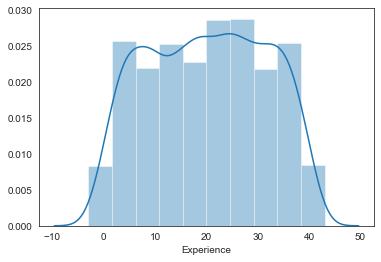

In [8]:
sns.set_style("white")
sns.distplot(df['Experience'],bins=10)

In [9]:
df[df['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

There are some value of experience in below 0 so we will correct it with fill mean experience above 0 in particular age

In [10]:
#  Get ages which have experience below 0
ages = df[df['Experience'] < 0]['Age'].unique().tolist()

# Get index which have experience below 0
indexes = df[df['Experience'] < 0].index.tolist()

# Fill value with mean experience
for i in indexes:
    for x in ages:
        df.loc[i,'Experience'] = round(df[(df.Age == x) & (df.Experience > 0)].Experience.mean(),0)


In [11]:
df[df['Experience'] < 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [12]:
df['Experience'].describe()

count    5000.000000
mean       20.140400
std        11.405644
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [13]:
df.to_csv('bank_loan.csv')

## Exploratory Data Analysis (EDA)

First, Drop Customer ID because it's not relate with another features and move Personal Loan to last columns because it become for our target. 

In [14]:
# Drop ID
df.drop(['ID'],axis=1,inplace=True)

In [15]:
# Move personal loan to last columns
target = df[['Personal Loan']]
df.drop(['Personal Loan'],axis=1,inplace=True)
df = pd.concat([df,target],axis=1)

In [16]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1.0,49,91107,4,1.6,1,0,1,0,0,0,0
1,45,19.0,34,90089,3,1.5,1,0,1,0,0,0,0
2,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,91330,4,1.0,2,0,0,0,0,1,0


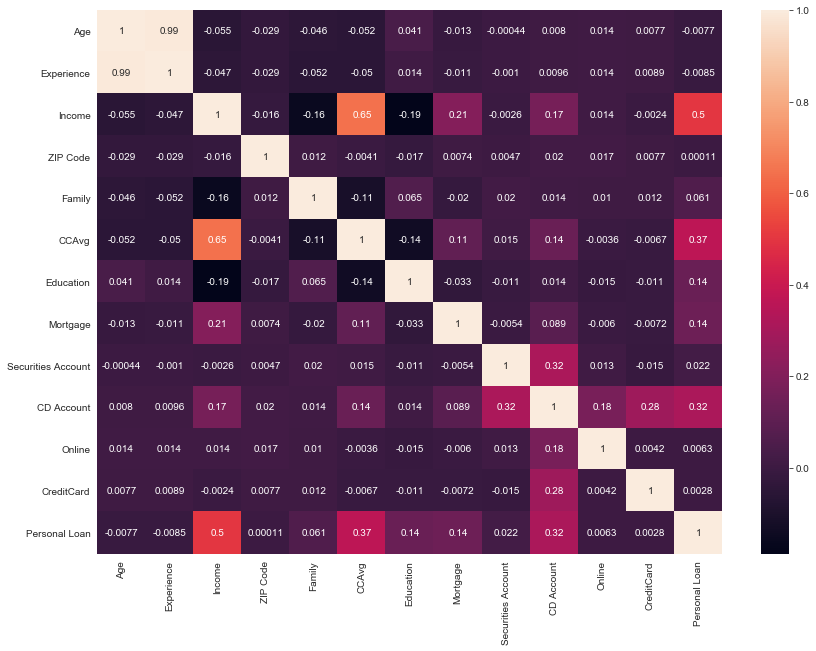

In [17]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True)

Heatmap show some correlation between features. We will pick some features as main variable for predict personal loan using Machine Learning.

C:\Users\irfanard\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\irfanard\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


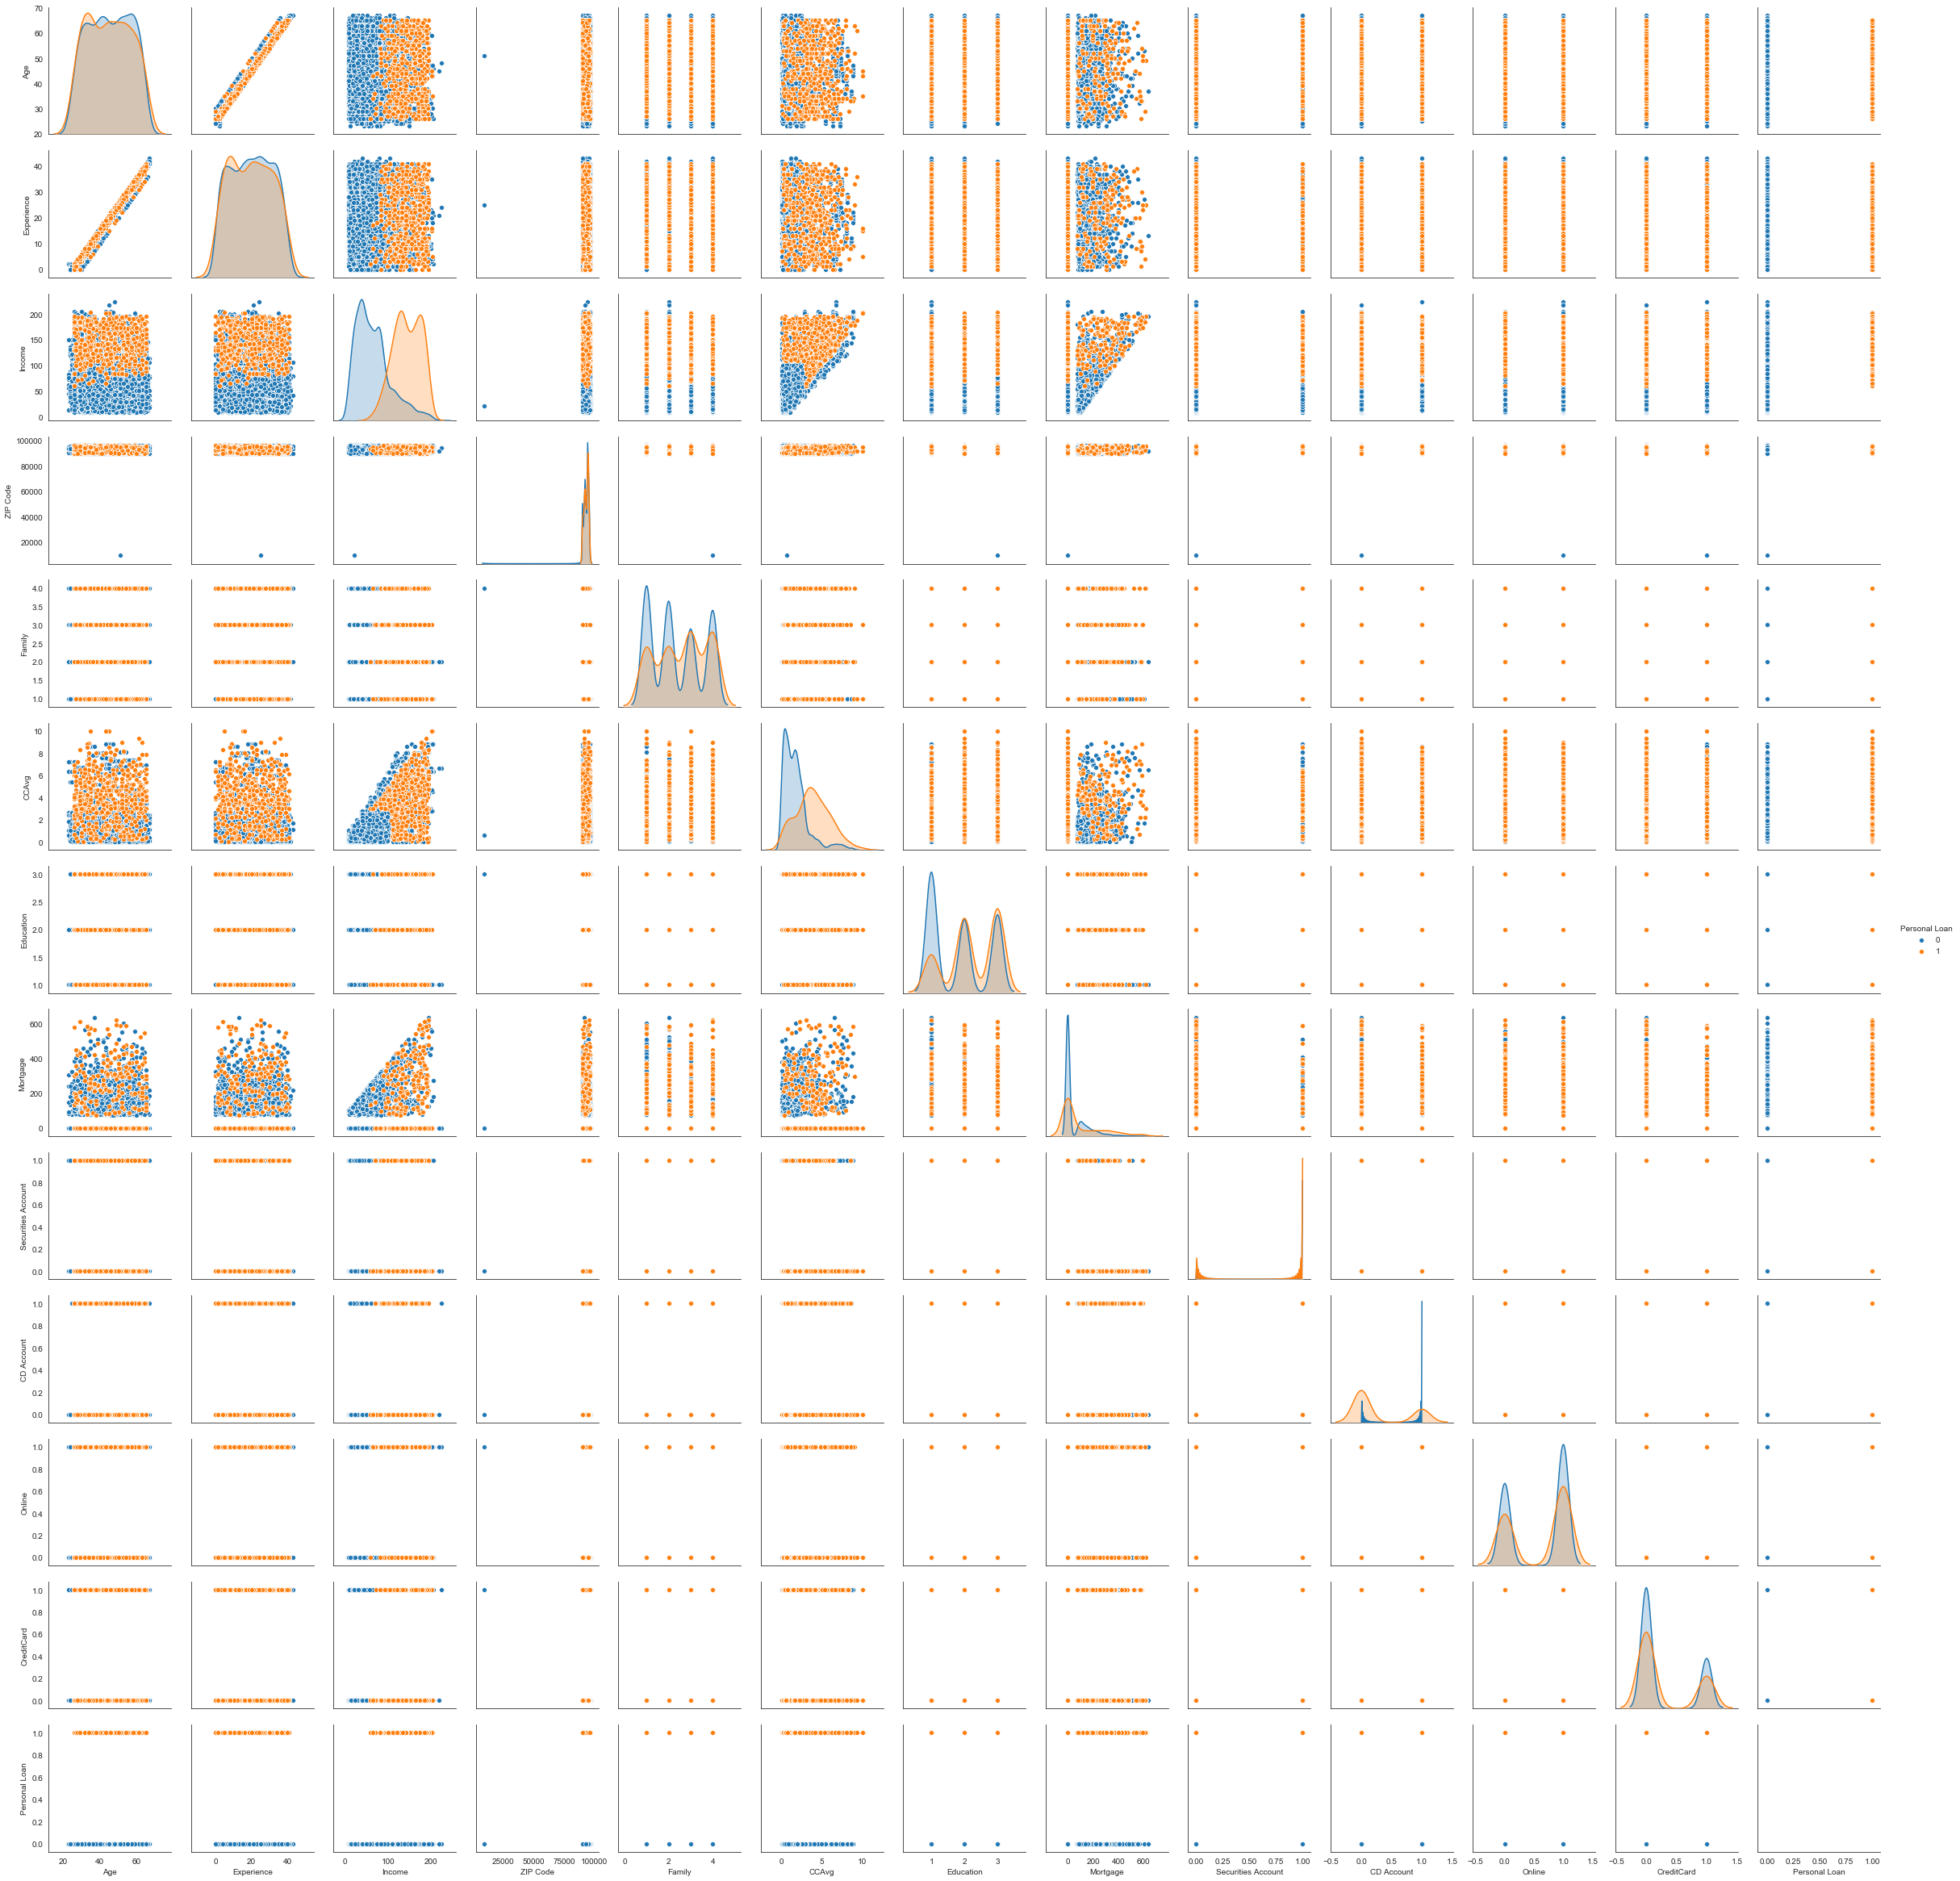

In [18]:
sns.pairplot(df, hue='Personal Loan')

In [19]:
feature_cat = {'Numerical':['Age','Experience','Income','CCAvg','Mortgage',' '],'Ordinal':['Family','Education',' ',' ',' ',' '],
              'Nominal':['ID','ZIP Code','Securities Account','CD Account','Online','Credit Card']}
feature_cat =  pd.DataFrame(data=feature_cat)

feature_cat

,Numerical,Ordinal,Nominal
0,Age,Family,ID
1,Experience,Education,ZIP Code
2,Income,,Securities Account
3,CCAvg,,CD Account
4,Mortgage,,Online
5,,,Credit Card


 First, I really corious about is there correlation between customer information(Age,Experience,etc) and Personal Loan. I will make some visualization for prove it.

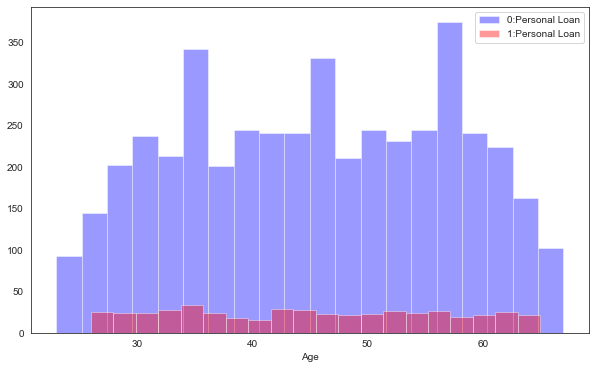

In [20]:
plt.figure(figsize=(10,6))
sns.distplot(df[df['Personal Loan'] == 0]['Age'], kde=False, bins = 20, color = 'blue',label='0:Personal Loan')
sns.distplot(df[df['Personal Loan'] == 1]['Age'], kde=False, bins = 20, color = 'red', label='1:Personal Loan')
plt.legend()


From Histogram show that customer mostly rejected loan, lets next visualization

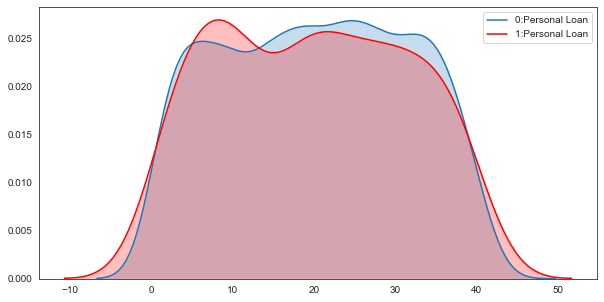

In [21]:
plt.figure(figsize=(10,5))
sns.kdeplot(df[df['Personal Loan'] == 0]['Experience'], shade=True, legend=False, label='0:Personal Loan')
sns.kdeplot(df[df['Personal Loan'] == 1]['Experience'], shade=True,color='red', legend=False, label='1:Personal Loan')
plt.legend()


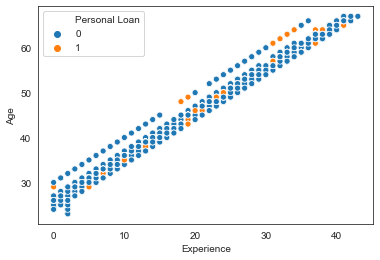

In [22]:
sns.scatterplot(x='Experience',y='Age',data=df,hue='Personal Loan')

Age and Experience still hard to describe between Accept and Rejected Loan. let's move to next features.

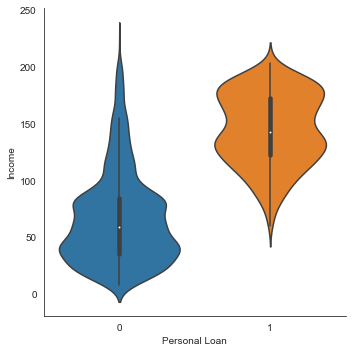

In [23]:
sns.catplot(data=df, x='Personal Loan' , y='Income', label='0:Personal Loan' , kind='violin')

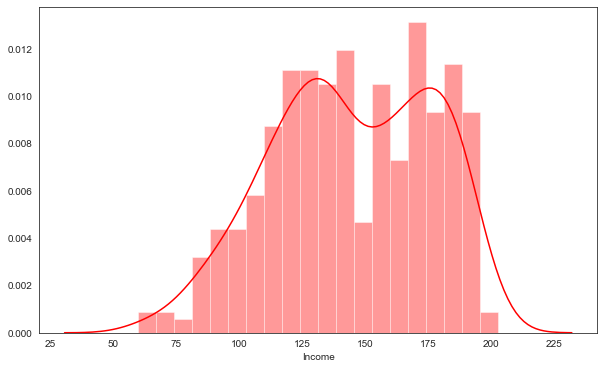

In [24]:
plt.figure(figsize=(10,6))
sns.distplot(df[df['Personal Loan'] == 1]['Income'], bins=20, color='red')

Customers who have high Income more chance to accept loan. I will use this for features. I still more want to know whether relationship income with others

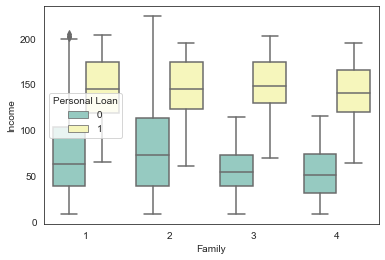

In [25]:
sns.boxplot(x="Family", y="Income", hue="Personal Loan", data=df, palette="Set3")

The proportion among family categories with income almost same. No significant difference

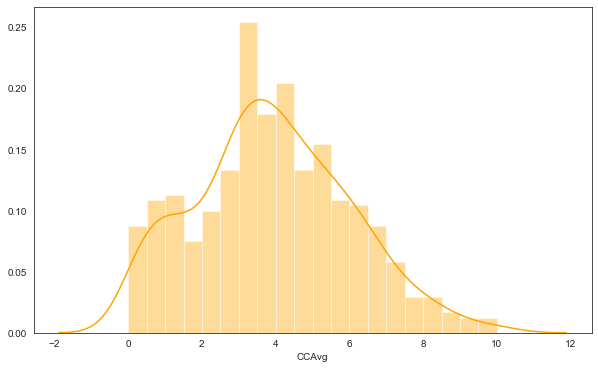

In [26]:
plt.figure(figsize=(10,6))
sns.distplot(df[df['Personal Loan'] == 1]['CCAvg'], bins=20, color='orange')

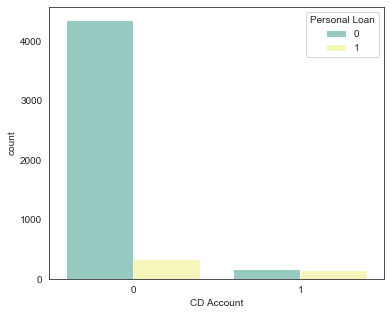

In [27]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='CD Account', hue='Personal Loan', palette='Set3')

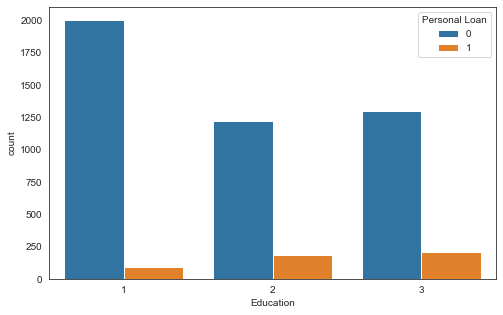

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Education', hue='Personal Loan')

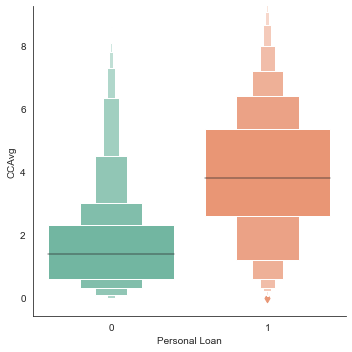

In [29]:
sns.catplot(data=df, x='Personal Loan' , y='CCAvg', label='0:Personal Loan' , kind='boxen', palette='Set2')

Customers who have high spend Credit credit per month lean accept loan.

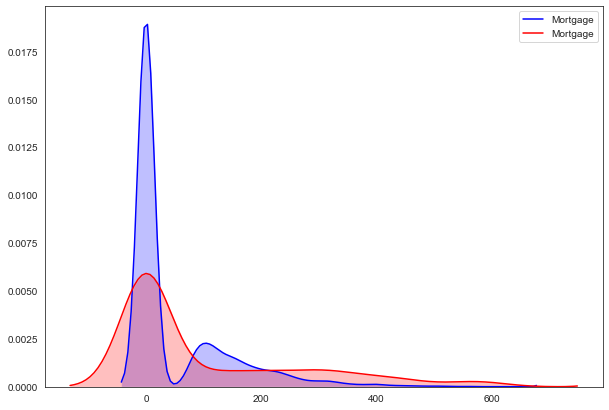

In [30]:
plt.figure(figsize=(10,7))
sns.kdeplot(df[df['Personal Loan'] == 0]['Mortgage'], shade = True, color = 'blue')
sns.kdeplot(df[df['Personal Loan'] == 1]['Mortgage'],shade=True, color = 'red')

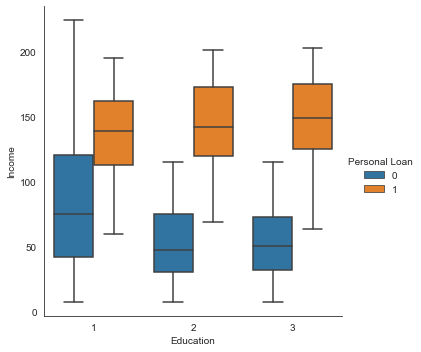

In [31]:
sns.catplot(data=df, x='Education', y='Income', hue='Personal Loan', kind='box')

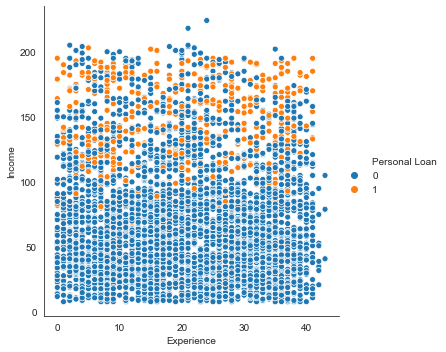

In [32]:
sns.relplot(data=df, x='Experience', y='Income', hue='Personal Loan')

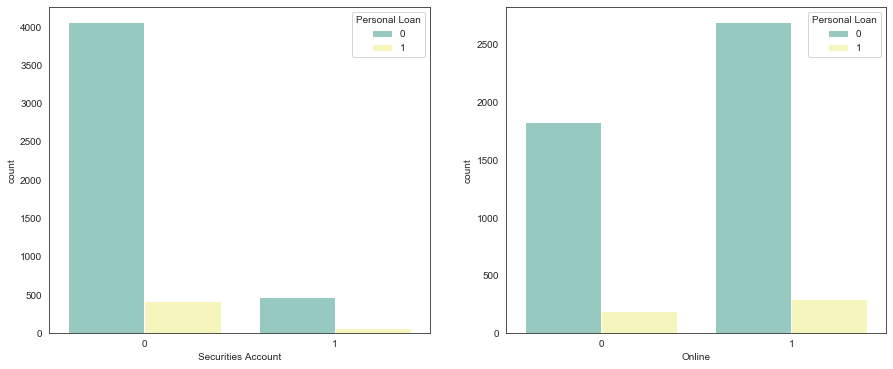

In [33]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6))

sns.countplot(data=df, x='Securities Account', hue='Personal Loan', ax=ax1, palette='Set3')
sns.countplot(data=df, x='Online', hue='Personal Loan', ax=ax2, palette='Set3')

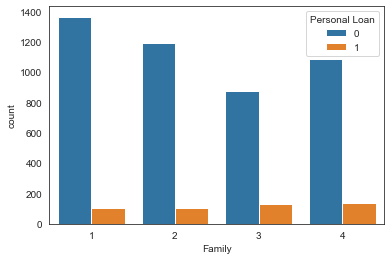

In [34]:
sns.countplot(data=df, x='Family', hue='Personal Loan')

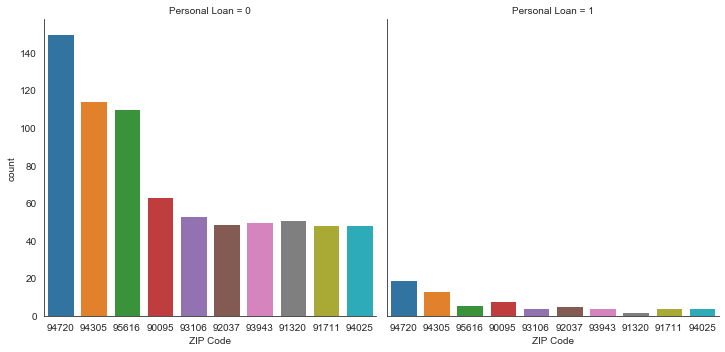

In [35]:
sns.catplot(data=df, x='ZIP Code', col='Personal Loan', kind='count',order = df['ZIP Code'].value_counts().head(10).index)

## Machine Learning
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. KNN

## Feature Selection

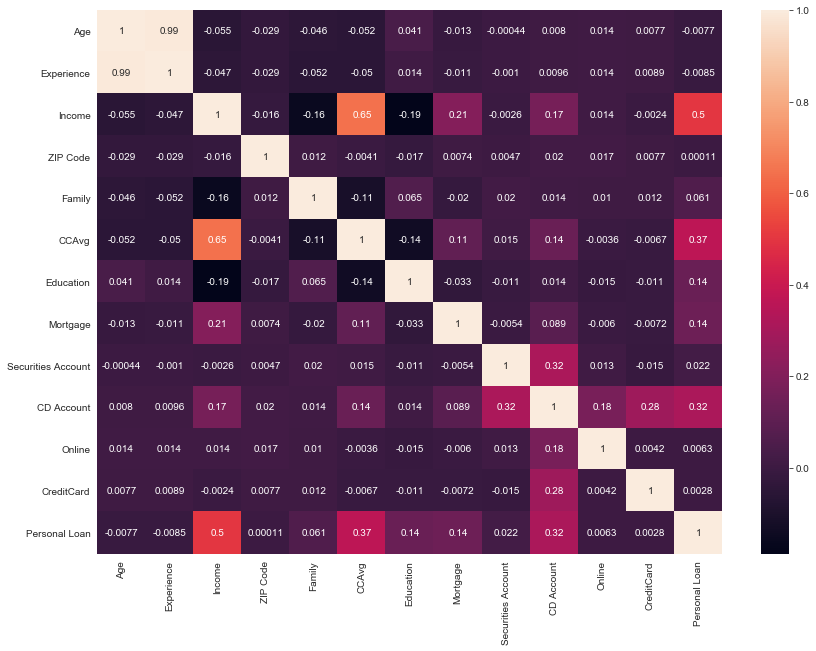

In [36]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True)

Based on Information of Heatmap and EDA, We know some features relevance with target variable (Personal Loan). We will use feature importance to make sure this.

In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [38]:
y= df['Personal Loan']
X= df.drop(['Personal Loan'], axis=1)

In [39]:
X.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size= 0.2, random_state=101)

In [41]:
classifier.fit(X_train, y_train)

C:\Users\irfanard\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
tree_feature = pd.Series(classifier.feature_importances_,X_train.columns).sort_values(ascending=True)

Text(0.5, 1.0, 'Feature Importance')

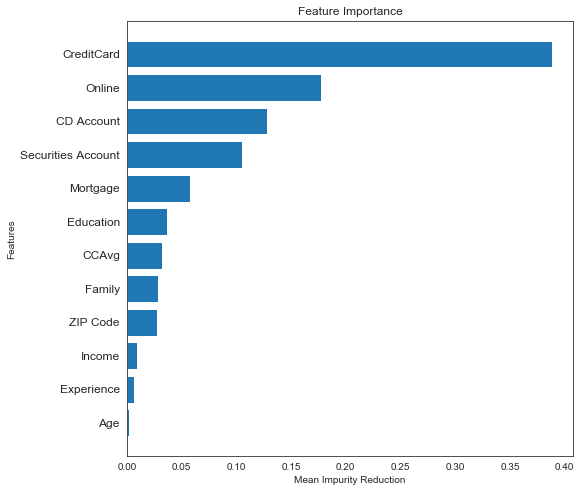

In [43]:
plt.figure(figsize=(8,8))
plt.barh(X.columns, tree_feature)
plt.xlabel('Mean Impurity Reduction')
plt.ylabel ('Features')
plt.yticks(fontsize=12)
plt.title('Feature Importance')

The result is different between correlation function and feature importance. Some feature high in correlation but low in feature importance so I though more relevant using correlation.

In [44]:
X.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,91107,4,1.6,1,0,1,0,0,0
1,45,19.0,34,90089,3,1.5,1,0,1,0,0,0
2,39,15.0,11,94720,1,1.0,1,0,0,0,0,0
3,35,9.0,100,94112,1,2.7,2,0,0,0,0,0
4,35,8.0,45,91330,4,1.0,2,0,0,0,0,1


In [45]:
X = df.drop(['Age','Experience','ZIP Code','Family','Securities Account','Online',
             'CreditCard'], axis=1)
X.drop(['Personal Loan'],axis=1,inplace=True)

In [46]:
X.columns

Index(['Income', 'CCAvg', 'Education', 'Mortgage', 'CD Account'], dtype='object')

## Run with the Model (Non Oversampling)

In [47]:
y_train.value_counts()

0    3607
1     393
Name: Personal Loan, dtype: int64

There are inbalanced value in Personal Loan, zero Personal Loan is more than one. First I will try run with this condition after that using oversampling and compare the result.

## 1. Logistic Regression

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size= 0.2, random_state=101)

In [49]:
# Import Logistic Regression Library
from sklearn.linear_model import LogisticRegression

In [50]:
# Define function and fit data
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\irfanard\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
predictions = logmodel.predict(X_test)

In [52]:
predict_proba = logmodel.predict_proba(X_test)

In [53]:
predict_proba

array([[0.99778943, 0.00221057],
       [0.89315736, 0.10684264],
       [0.99823352, 0.00176648],
       ...,
       [0.99641981, 0.00358019],
       [0.91437069, 0.08562931],
       [0.59898463, 0.40101537]])

In [54]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, accuracy_score, matthews_corrcoef, auc, log_loss,f1_score

In [55]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[904   9]
 [ 41  46]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       913
           1       0.84      0.53      0.65        87

    accuracy                           0.95      1000
   macro avg       0.90      0.76      0.81      1000
weighted avg       0.95      0.95      0.94      1000



## 2. Decision Tree

In [56]:
# Import Decision Tree Library
from sklearn.tree import DecisionTreeClassifier

In [57]:
# Define Decision Tree function
dtree = DecisionTreeClassifier()

In [58]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [59]:
predictions = dtree.predict(X_test)

In [60]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[887  26]
 [ 21  66]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       913
           1       0.72      0.76      0.74        87

    accuracy                           0.95      1000
   macro avg       0.85      0.87      0.86      1000
weighted avg       0.95      0.95      0.95      1000



## 3. KNN

In [61]:
# Import Standard scaler for feature scaling
from sklearn.preprocessing import StandardScaler

In [62]:
# Define standardscaler function
scaler = StandardScaler()

In [63]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [64]:
scaled_features = scaler.transform(X_train)

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

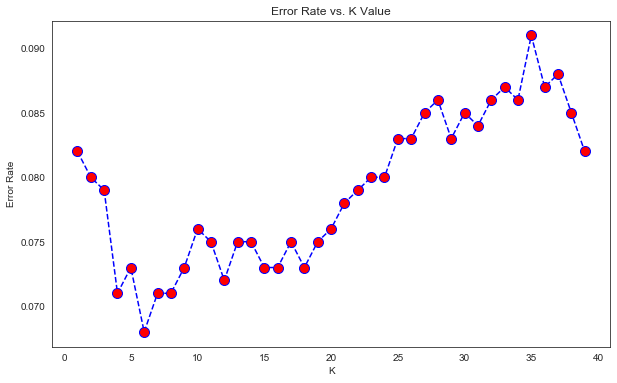

In [67]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [68]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=6')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=6


[[901  12]
 [ 56  31]]


              precision    recall  f1-score   support

           0       0.94      0.99      0.96       913
           1       0.72      0.36      0.48        87

    accuracy                           0.93      1000
   macro avg       0.83      0.67      0.72      1000
weighted avg       0.92      0.93      0.92      1000



In [69]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[882  31]
 [ 48  39]]


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       913
           1       0.56      0.45      0.50        87

    accuracy                           0.92      1000
   macro avg       0.75      0.71      0.73      1000
weighted avg       0.91      0.92      0.92      1000



## 4. Random Forest

In [70]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start= 200, stop = 2000, num = 10)]

# Number of features to consider
max_features=['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start= 100, stop = 1000, num=100)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 11, num = 10)]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth':max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'bootstrap': bootstrap}

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rfc =  RandomForestClassifier()

In [73]:
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid,
                               n_iter= 10 , cv= 3, n_jobs = -1, scoring = 'precision')

In [74]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [75]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 481,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [76]:
rfc = RandomForestClassifier(n_estimators=1000, min_samples_split=290, min_samples_leaf=2, max_features='sqrt',
                            max_depth=40, bootstrap=True)

In [77]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=40, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=290,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
rfc_pred = rfc.predict(X_test)

In [79]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,rfc_pred))


[[887  26]
 [ 21  66]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       913
           1       0.98      0.61      0.75        87

    accuracy                           0.96      1000
   macro avg       0.97      0.80      0.87      1000
weighted avg       0.97      0.96      0.96      1000



In [80]:
nonsample_recap = {'Logistic':[0.84,0.95],'Decision Tree':[0.70,0.95], 'KNN':[0.56,0.92],'Random Forest':[0.98,0.96]}
nonsample_recap =  pd.DataFrame(index=['1:Precision','Accuracy'],data=nonsample_recap)

nonsample_recap

,Logistic,Decision Tree,KNN,Random Forest
1:Precision,0.84,0.70,0.56,0.98
Accuracy,0.95,0.95,0.92,0.96


Random forest is the best model for using non oversampling with precision 0.98 and Accuracy 0.96. Let's next using Oversampling

## SMOTE (OverSampling)

Target features got imbalanced between two categories so first we oversampling using SMOTE scheme.

In [81]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = 'minority')

oversampled_trainX, oversampled_trainY = sm.fit_sample(X_train, y_train)
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
col = ['Personal Loan']
col.extend(list(X_train.columns))
oversampled_train.columns = col

In [82]:
oversampled_trainX

array([[ 72.        ,   1.4       ,   3.        ,   0.        ,
          0.        ],
       [103.        ,   0.8       ,   2.        ,   0.        ,
          0.        ],
       [ 88.        ,   1.8       ,   2.        ,   0.        ,
          0.        ],
       ...,
       [150.53558337,   5.10506666,   2.56091667, 254.95174998,
          0.        ],
       [102.02786758,   4.48606621,   3.        ,   0.        ,
          0.        ],
       [182.00697944,   4.45296626,   2.74912757, 573.5087243 ,
          0.74912757]])

In [83]:
oversampled_train['Personal Loan'].value_counts()

1    3607
0    3607
Name: Personal Loan, dtype: int64

## Run with Model (Using Oversampling)

## 1. Logistic Regression

In [84]:
# Import Logistic Regression Library
from sklearn.linear_model import LogisticRegression

In [85]:
# Define function and fit data
logmodel = LogisticRegression()
logmodel.fit(oversampled_trainX,oversampled_trainY)

C:\Users\irfanard\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
predictions = logmodel.predict(X_test)

In [87]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, accuracy_score, matthews_corrcoef, auc, log_loss,f1_score

In [88]:
print(confusion_matrix(y_test,predictions))

[[808 105]
 [ 10  77]]


In [89]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       913
           1       0.42      0.89      0.57        87

    accuracy                           0.89      1000
   macro avg       0.71      0.89      0.75      1000
weighted avg       0.94      0.89      0.90      1000



## 2. Decision Tree

In [90]:
# Import Decision Tree Library
from sklearn.tree import DecisionTreeClassifier

In [91]:
# Define Decision Tree function
dtree = DecisionTreeClassifier()

In [92]:
dtree.fit(oversampled_trainX,oversampled_trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [93]:
predictions = dtree.predict(X_test)

In [94]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       913
           1       0.71      0.75      0.73        87

    accuracy                           0.95      1000
   macro avg       0.85      0.86      0.85      1000
weighted avg       0.95      0.95      0.95      1000



## 3. KNN

In [95]:
# Import Standard scaler for feature scaling
from sklearn.preprocessing import StandardScaler

In [96]:
# Define standardscaler function
scaler = StandardScaler()

In [97]:
scaler.fit(oversampled_trainX)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [98]:
scaled_features = scaler.transform(oversampled_trainX)

In [99]:
# X_train, X_test, y_train, y_test = train_test_split(oversampled_trainX,oversampled_trainY,
#                                                     test_size=0.30, random_state=101)

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(oversampled_trainX,oversampled_trainY)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

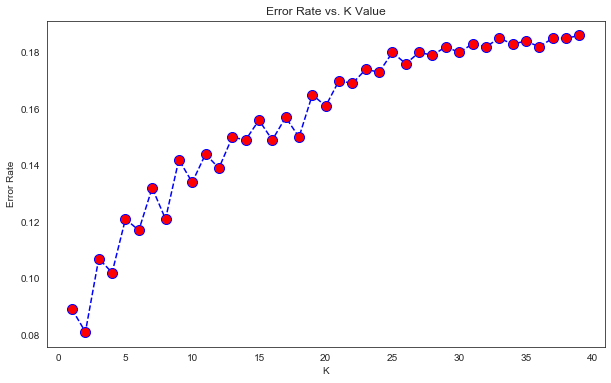

In [102]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [103]:
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(oversampled_trainX,oversampled_trainY)
pred = knn.predict(X_test)

print('WITH K=25')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=25


[[737 176]
 [  4  83]]


              precision    recall  f1-score   support

           0       0.99      0.81      0.89       913
           1       0.32      0.95      0.48        87

    accuracy                           0.82      1000
   macro avg       0.66      0.88      0.69      1000
weighted avg       0.94      0.82      0.86      1000



In [104]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(oversampled_trainX,oversampled_trainY)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[823  90]
 [ 17  70]]


              precision    recall  f1-score   support

           0       0.98      0.90      0.94       913
           1       0.44      0.80      0.57        87

    accuracy                           0.89      1000
   macro avg       0.71      0.85      0.75      1000
weighted avg       0.93      0.89      0.91      1000



## Random Forest

In [105]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start= 200, stop = 2000, num = 10)]

# Number of features to consider
max_features=['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start= 100, stop = 1000, num=100)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 11, num = 10)]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth':max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'bootstrap': bootstrap}

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
rfc =  RandomForestClassifier()

In [108]:
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid,
                               n_iter= 10 , cv= 3, n_jobs = -1, scoring = 'precision')

In [109]:
rf_random.fit(oversampled_trainX, oversampled_trainY)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [110]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 118,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

In [111]:
rfc = RandomForestClassifier(n_estimators=1800, min_samples_split=527, min_samples_leaf=11, max_features='sqrt',
                            max_depth=30, bootstrap=False)

In [112]:
rfc.fit(oversampled_trainX, oversampled_trainY)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=527,
                       min_weight_fraction_leaf=0.0, n_estimators=1800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [113]:
rfc_pred = rfc.predict(X_test)

In [114]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       913
           1       0.70      0.83      0.76        87

    accuracy                           0.95      1000
   macro avg       0.84      0.90      0.87      1000
weighted avg       0.96      0.95      0.96      1000



In [115]:
print(confusion_matrix(y_test,predictions))

[[887  26]
 [ 22  65]]


In [116]:
oversample_recap = {'Logistic':[0.42,0.88],'Decision Tree':[0.70,0.95], 'KNN':[0.45,0.90],'Random Forest':[0.72,0.96]}
oversample_recap =  pd.DataFrame(index=['1:Precision','Accuracy'],data=oversample_recap)

oversample_recap

,Logistic,Decision Tree,KNN,Random Forest
1:Precision,0.42,0.70,0.45,0.72
Accuracy,0.88,0.95,0.90,0.96


Using SMOTE Oversampling, the best model is still Random Forest with 1 precision is 0.72 and Accuracy 0.96

Based on experiment using or non oversampling, I decide this project using random forest with non oversampler 

## Set Random Forest as Model 

In [117]:
rfc = RandomForestClassifier(n_estimators=1000, min_samples_split=290, min_samples_leaf=2, max_features='sqrt',
                            max_depth=40, bootstrap=True)

In [118]:
rfc.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=40, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=290,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [119]:
import pickle

In [120]:
personalloan_predictor = pickle.dump(rfc, open('personalloan_predictor.sav','wb'))

In [121]:
X.head(10)

,Income,CCAvg,Education,Mortgage,CD Account
0,49,1.6,1,0,0
1,34,1.5,1,0,0
2,11,1.0,1,0,0
3,100,2.7,2,0,0
4,45,1.0,2,0,0
5,29,0.4,2,155,0
6,72,1.5,2,0,0
7,22,0.3,3,0,0
8,81,0.6,2,104,0
9,180,8.9,3,0,0


In [122]:
df.head(10)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1.0,49,91107,4,1.6,1,0,1,0,0,0,0
1,45,19.0,34,90089,3,1.5,1,0,1,0,0,0,0
2,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,91330,4,1.0,2,0,0,0,0,1,0
5,37,13.0,29,92121,4,0.4,2,155,0,0,1,0,0
6,53,27.0,72,91711,2,1.5,2,0,0,0,1,0,0
7,50,24.0,22,93943,1,0.3,3,0,0,0,0,1,0
8,35,10.0,81,90089,3,0.6,2,104,0,0,1,0,0
9,34,9.0,180,93023,1,8.9,3,0,0,0,0,0,1


In [123]:
rfc.predict(np.array([180,8.9,3,0,0]).reshape(1,-1))[0]

1

In [124]:
def loan_prediction (income,ccavg,education,mortgage,cdaccount):
    result = rfc.predict(np.array([income,ccavg,education,mortgage,cdaccount]).reshape(1,-1))[0]
    if result == 1:
        print ('Customer accept personal loan')
    elif result == 0:
        print ('Customer reject personal loan')

In [125]:
loan_prediction(180,2,2,0,1)

Customer accept personal loan


In [143]:
df[(df['Personal Loan'] == 0)]['Mortgage'].value_counts()

0      3150
98       17
89       16
103      16
83       16
102      15
90       15
78       15
119      15
91       15
131      14
104      14
101      14
87       14
116      13
94       13
118      13
112      13
109      13
100      12
185      12
81       12
144      12
106      11
76       11
97       11
137      11
95       11
121      11
79       11
       ... 
345       1
337       1
321       1
265       1
385       1
173       1
524       1
508       1
500       1
496       1
464       1
381       1
389       1
258       1
509       1
246       1
234       1
206       1
601       1
565       1
553       1
505       1
405       1
481       1
475       1
449       1
437       1
433       1
429       1
461       1
Name: Mortgage, Length: 305, dtype: int64

In [142]:
df[(df['Personal Loan'] == 1)]['Mortgage'].value_counts()

0      312
301      5
282      3
342      3
209      2
115      2
327      2
111      2
251      2
106      2
294      2
99       2
120      2
149      2
86       2
372      2
400      2
307      2
198      2
422      2
221      2
428      2
229      2
184      2
171      1
192      1
204      1
140      1
142      1
203      1
      ... 
260      1
212      1
213      1
216      1
483      1
231      1
234      1
237      1
240      1
246      1
249      1
253      1
255      1
259      1
266      1
318      1
272      1
277      1
281      1
292      1
295      1
297      1
299      1
304      1
305      1
308      1
310      1
312      1
315      1
227      1
Name: Mortgage, Length: 141, dtype: int64